In [1]:
from tensorflow.python.client import device_lib

print(device_lib.list_local_devices())

2023-09-26 21:19:30.258032: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-26 21:19:33.583066: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-09-26 21:19:33.584066: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-26 21:19:39.844845: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 14629135862492262117
xla_global_id: -1
]


In [1]:
from keras.datasets import cifar100
import numpy as np
import tensorflow as tf
from keras import layers

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

print(x_train.shape)
print(y_train.shape)

169001437/169001437 [==============================] - 10s 0us/step
(50000, 32, 32, 3)
(50000, 1)


In [4]:
activation_mode = "relu"
epochs = 20

model = tf.keras.Sequential([
    layers.Conv2D(
        filters=100,
        kernel_size=3,
        activation=activation_mode,
        input_shape=(32, 32, 3)
    ),
    layers.Conv2D(100, 3, activation=activation_mode),
    layers.Dropout(0.4),
    layers.MaxPool2D(),
    layers.Conv2D(100, 3, activation=activation_mode),
    layers.Conv2D(100, 3, activation=activation_mode),
    layers.Dropout(0.4),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(100, activation="softmax"),
    layers.Dropout(0.4),
])

model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"]
)

model.fit(
    x_train,
    y_train,
    epochs=epochs
)

Epoch 1/20
1563/1563 [==============================] - 70s 45ms/step - loss: 8.4767 - accuracy: 0.0776
Epoch 2/20
1563/1563 [==============================] - 70s 45ms/step - loss: 8.0926 - accuracy: 0.1545
Epoch 3/20
1563/1563 [==============================] - 70s 45ms/step - loss: 7.9047 - accuracy: 0.1847
Epoch 4/20
1563/1563 [==============================] - 70s 45ms/step - loss: 7.6498 - accuracy: 0.2115
Epoch 5/20
1563/1563 [==============================] - 70s 45ms/step - loss: 7.5501 - accuracy: 0.2259
Epoch 6/20
1563/1563 [==============================] - 70s 45ms/step - loss: 7.4093 - accuracy: 0.2421
Epoch 7/20
1563/1563 [==============================] - 70s 45ms/step - loss: 7.2773 - accuracy: 0.2533
Epoch 8/20
1563/1563 [==============================] - 70s 45ms/step - loss: 7.1938 - accuracy: 0.2614
Epoch 9/20
1563/1563 [==============================] - 70s 45ms/step - loss: 7.1754 - accuracy: 0.2667
Epoch 10/20
1563/1563 [==============================] - 70s 45m

In [4]:
model.save("cifar100-model.h5")

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [1]:
model.evaluate(x_test, y_test)

predictions = model.predict(x_test)

NameError: name 'model' is not defined

/tmp/ipykernel_2373/2900419756.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


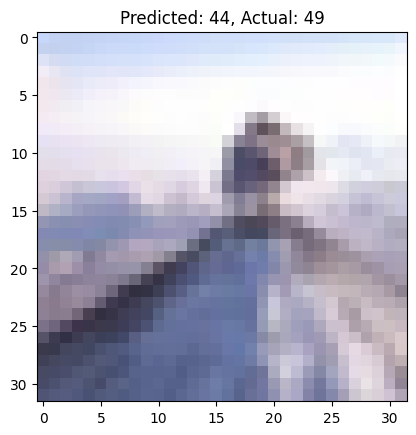

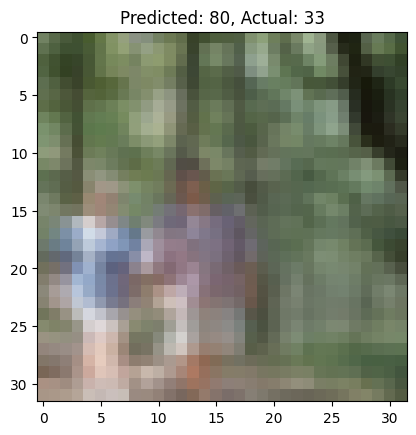

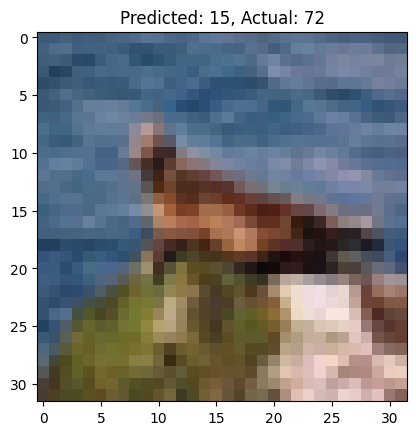

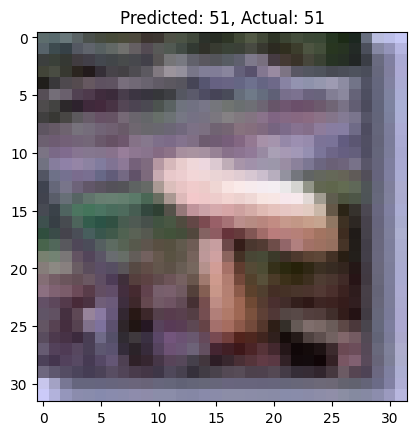

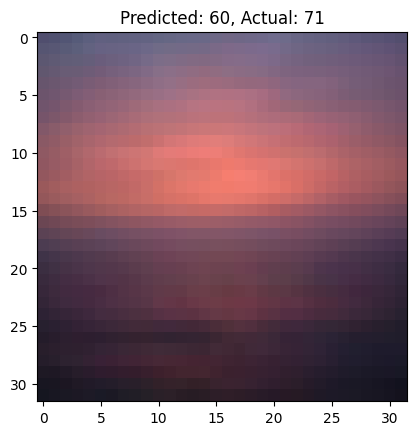

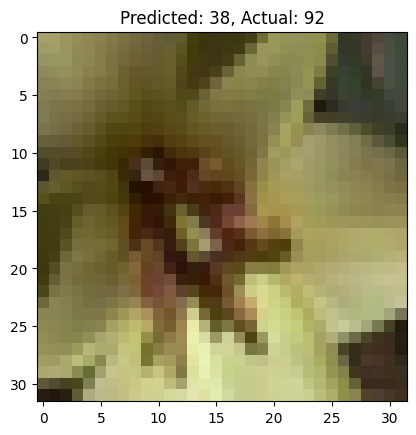

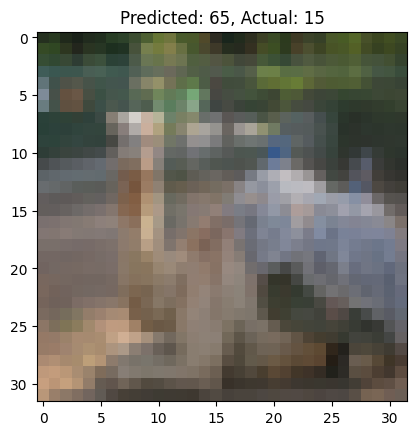

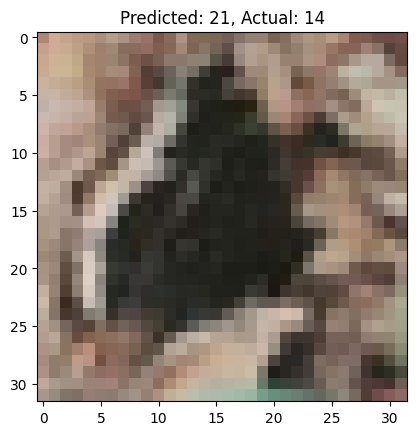

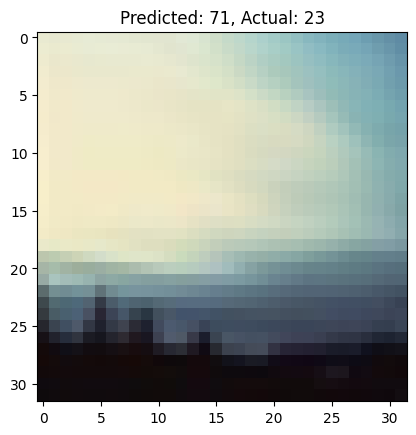

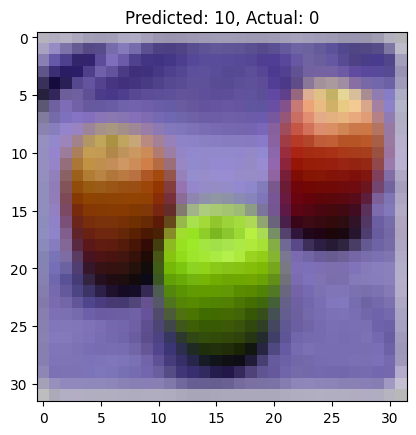

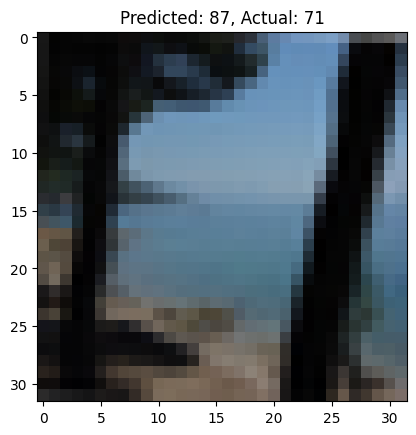

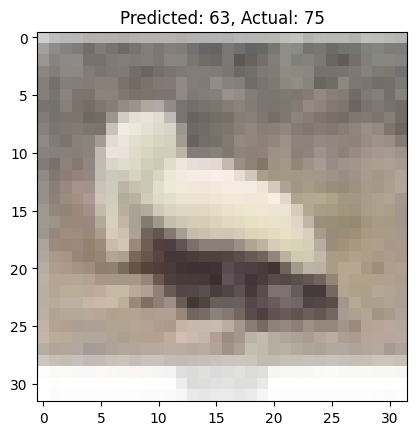

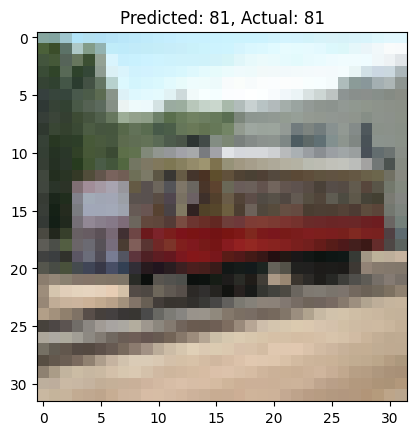

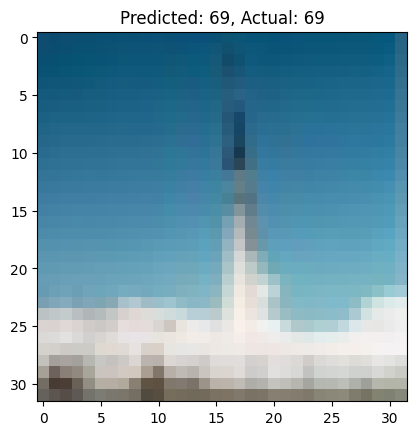

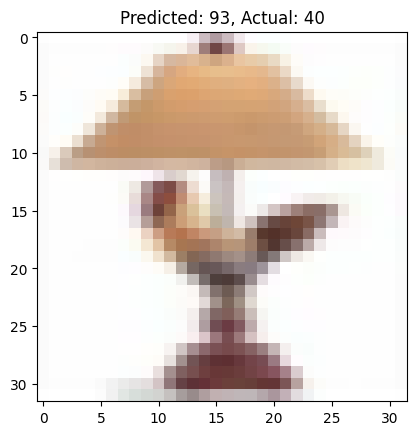

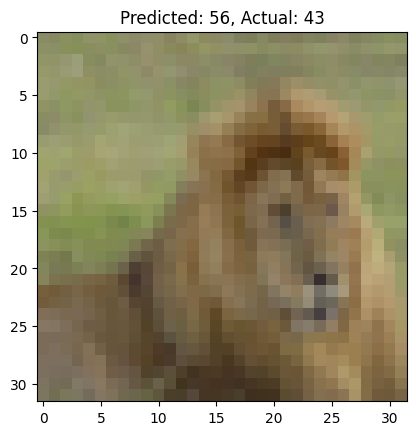

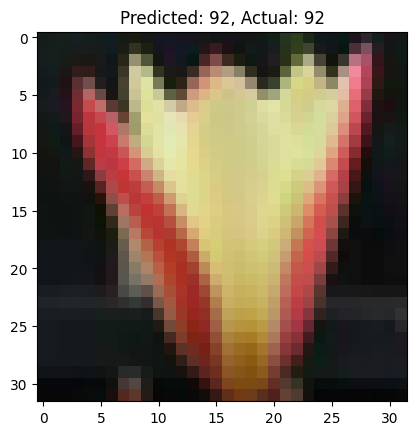

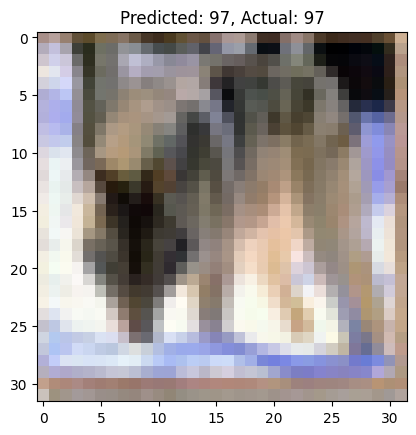

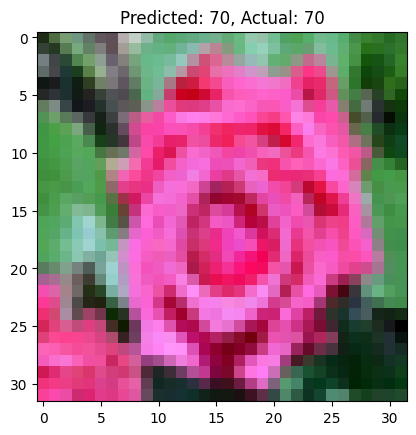

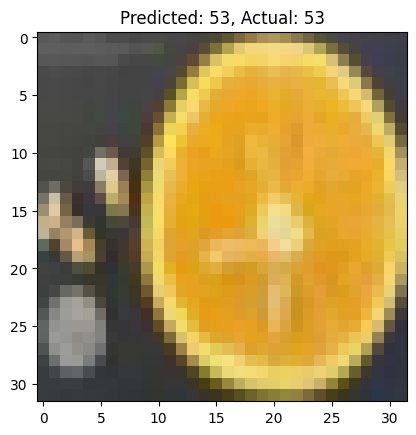

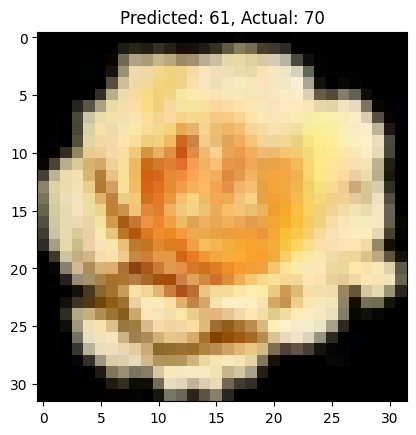

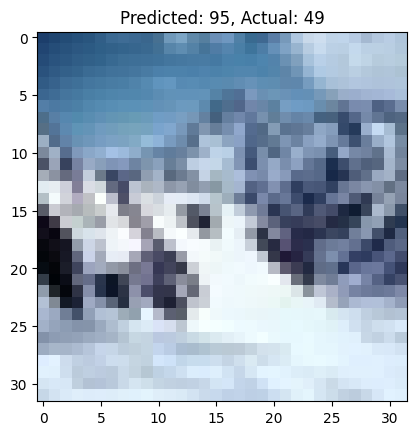

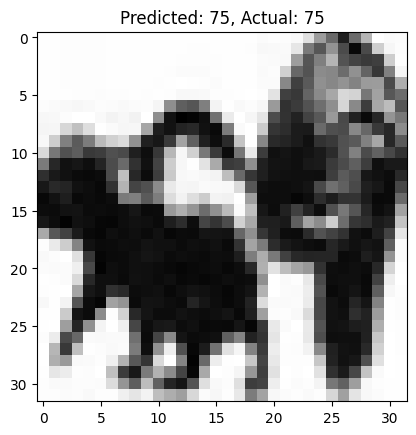

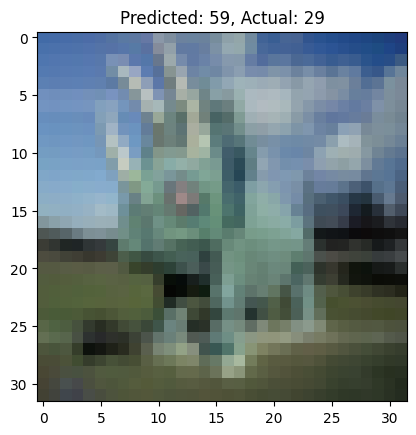

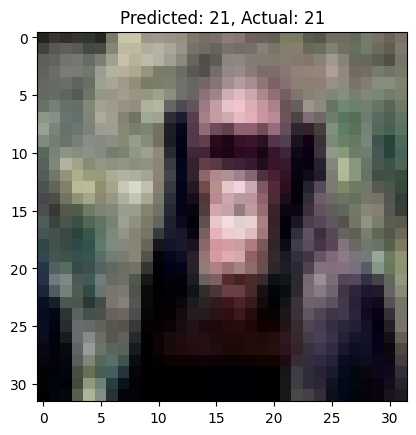

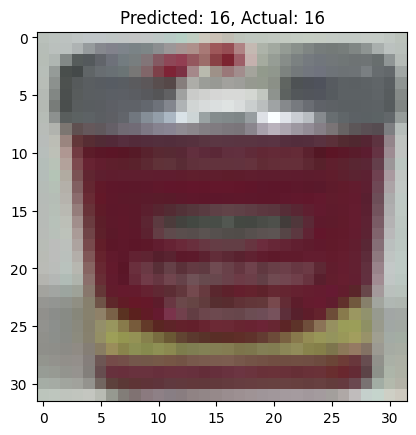

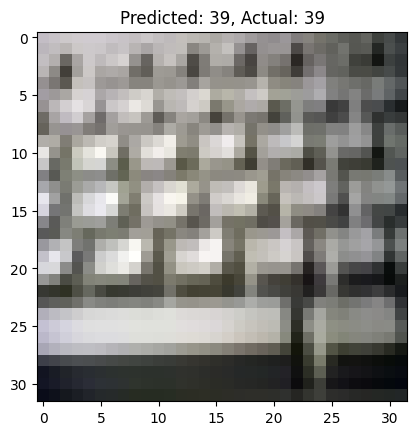

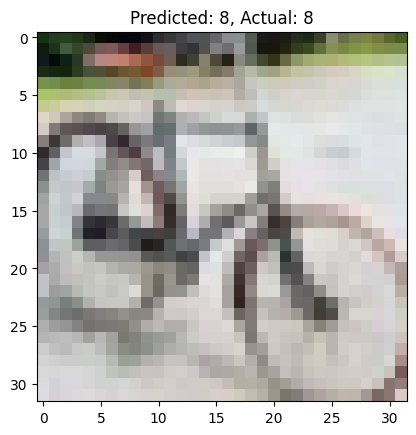

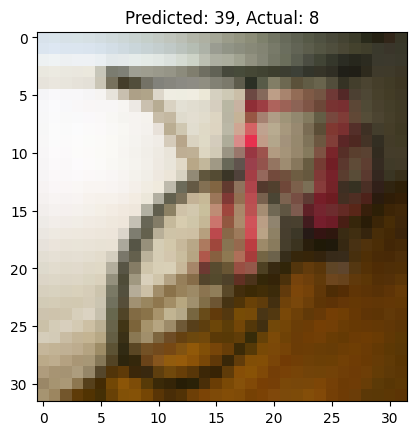

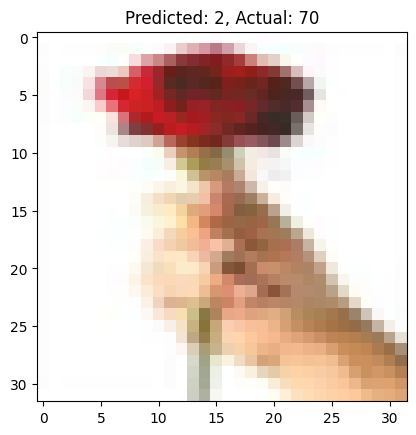

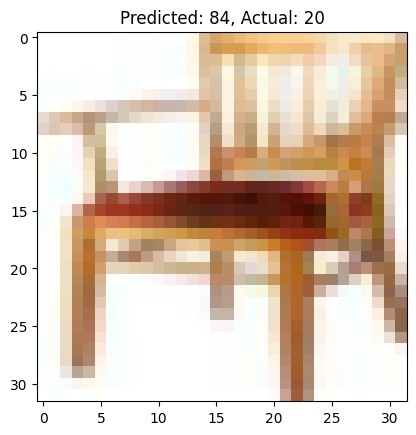

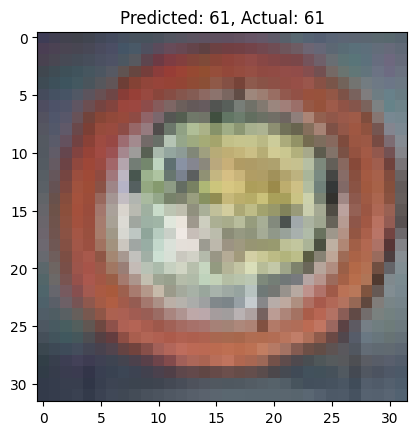

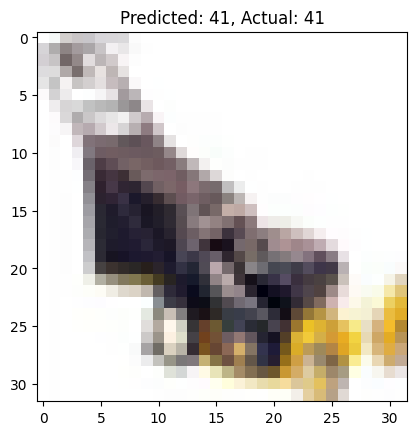

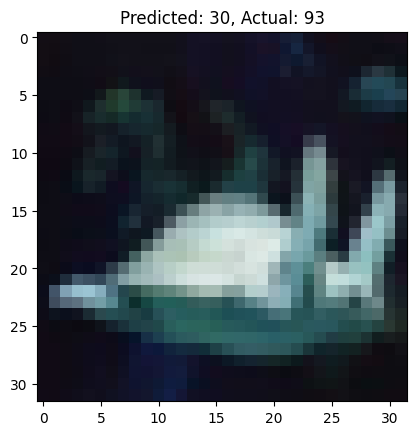

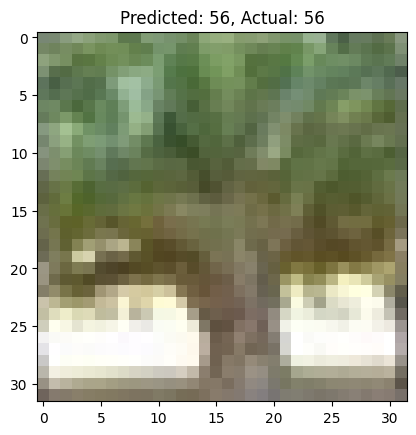

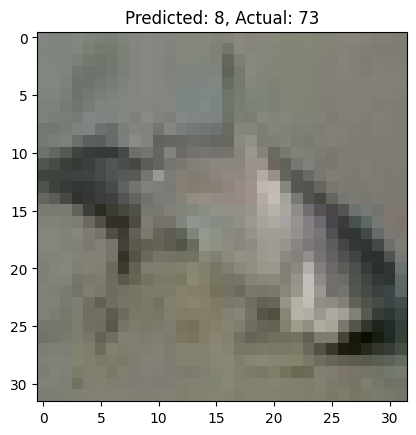

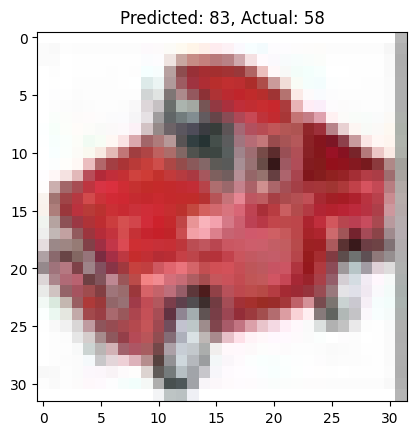

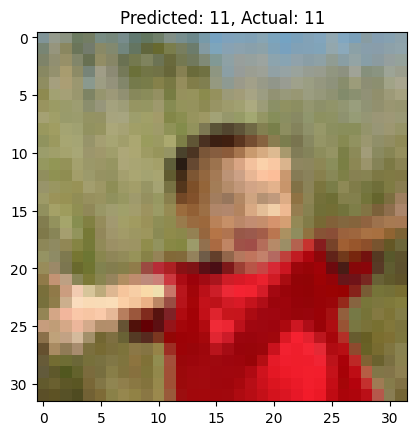

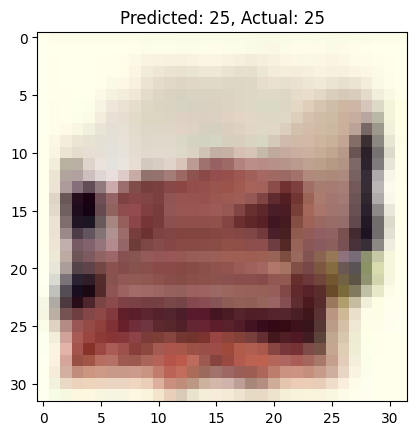

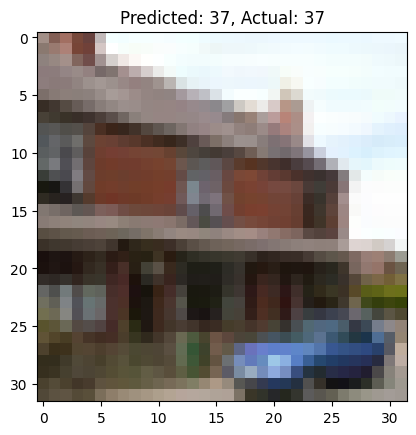

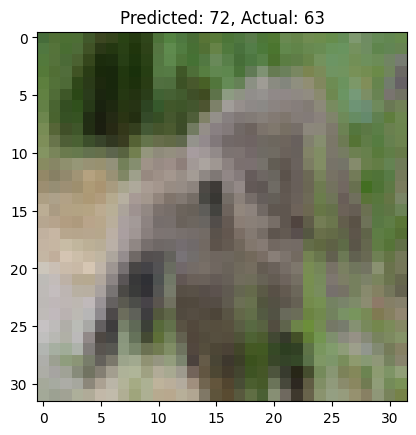

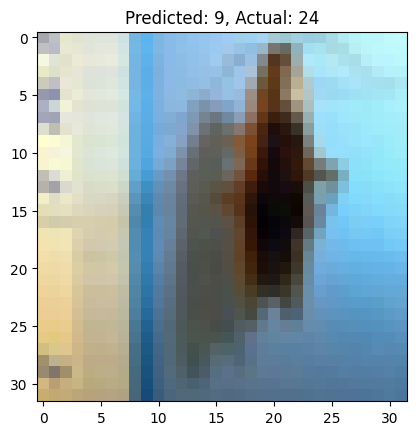

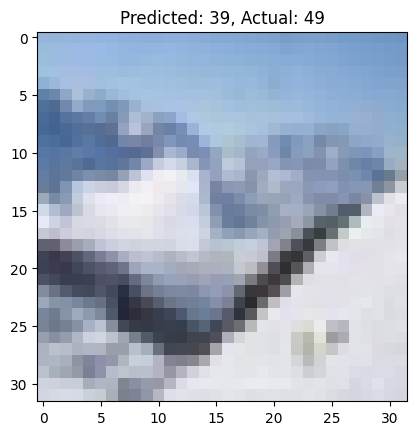

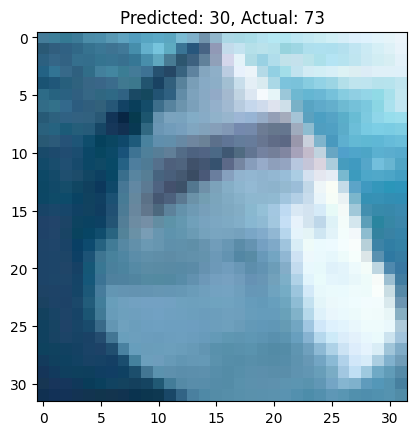

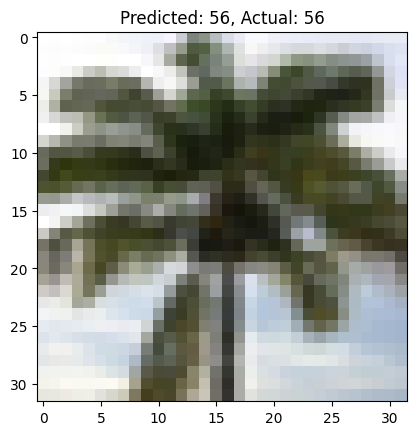

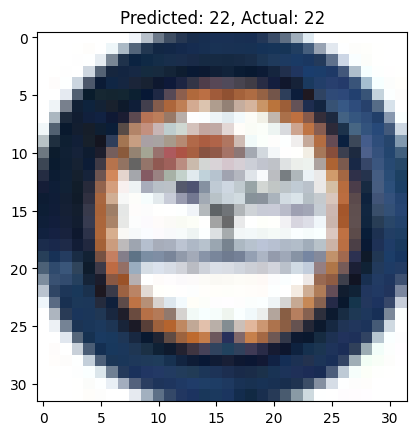

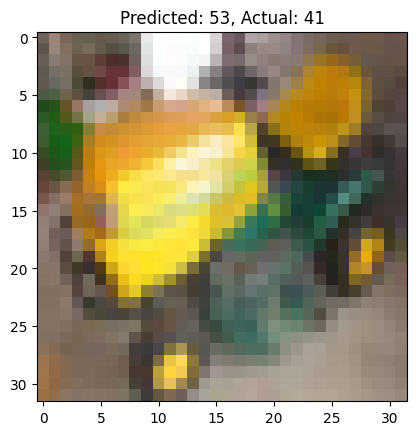

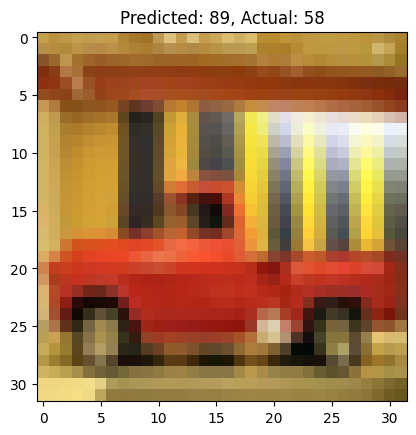

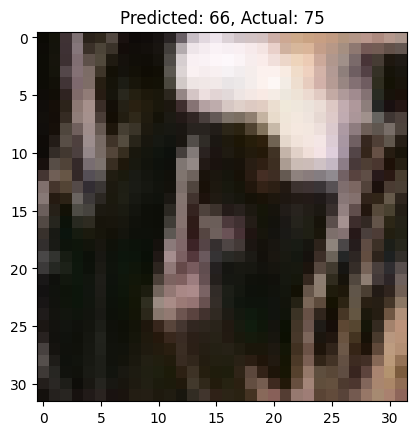

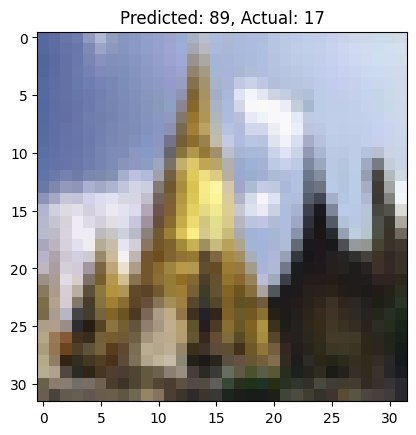

In [6]:
import matplotlib.pyplot as plt
import numpy as np
sample_predictions = 50

real_titles = np.argmax(predictions, axis=1)

for i in range(sample_predictions):
    plt.figure()
    plt.imshow(x_test[i])
    plt.title(f"Predicted: {real_titles[i]}, Actual: {int(y_test[i])}")